## Introduction:
<font size='3'> 
* This is a very rough toy example of the data challenge, and should only be used for your reference. 
* Please refer to day1 - day3 bootcamp materials for each specific method.   
</font>

In [1]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve,auc, accuracy_score, make_scorer,recall_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

### 1. EDA

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('X_test.csv')

In [3]:
print(train.shape)
print(test.shape)

(686, 36)
(172, 35)


In [4]:
train.head()

,index,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
0,341,19,1.0,16.0,1.0,0.0,0.0,0.00,NaN,NaN,...,0,NaN,NaN,0,0,0,0,0,0,0
1,584,30,2.0,18.0,1.0,0.0,0.0,0.00,0.0,0.00,...,0,NaN,NaN,0,0,0,0,0,0,0
2,77,33,3.0,21.0,1.0,0.0,0.0,0.00,1.0,2.00,...,0,NaN,NaN,0,0,0,0,0,0,0
3,414,20,3.0,15.0,1.0,1.0,1.0,0.15,0.0,0.00,...,0,NaN,NaN,0,0,0,0,0,0,0
4,249,22,3.0,13.0,1.0,0.0,0.0,0.00,1.0,0.25,...,0,NaN,NaN,0,0,0,0,0,0,0


In [5]:
test.head()

,index,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology
0,462,17,5.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0,0,0,0,0,0
1,23,40,1.0,20.0,2.0,0.0,0.0,0.0,1.0,15.0,...,0.0,0,NaN,NaN,1,0,1,1,1,0
2,276,21,4.0,17.0,3.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0,NaN,NaN,0,0,0,0,0,0
3,342,21,2.0,16.0,1.0,0.0,0.0,0.0,1.0,0.5,...,0.0,0,NaN,NaN,0,0,0,0,0,0
4,536,16,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0,0,0,0,0,0


In [6]:
train.describe()

,index,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
count,686.000000,686.000000,668.000000,682.000000,645.000000,676.000000,676.000000,676.000000,606.000000,606.000000,...,686.000000,57.000000,57.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.00000,686.000000
mean,434.053936,26.849854,2.495509,17.127566,2.279070,0.137574,1.109266,0.389387,0.635314,2.255532,...,0.086006,6.614035,6.245614,0.018950,0.011662,0.018950,0.037901,0.087464,0.05102,0.064140
std,248.990426,8.419783,1.460621,2.948382,1.456282,0.344707,3.872360,1.777920,0.481740,3.803973,...,0.290797,6.146295,5.982954,0.136449,0.107437,0.136449,0.191096,0.282719,0.22020,0.245181
min,0.000000,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,218.250000,20.250000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,433.500000,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,...,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,652.750000,31.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,857.000000,84.000000,15.000000,32.000000,11.000000,1.000000,34.000000,22.000000,1.000000,30.000000,...,2.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [7]:
test.describe()

,index,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology
count,172.000000,172.000000,164.000000,169.000000,157.000000,169.000000,169.000000,169.000000,144.000000,144.000000,...,150.000000,172.000000,14.000000,14.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,406.348837,26.703488,2.658537,16.461538,2.261146,0.177515,1.661544,0.708170,0.666667,2.260154,...,0.006667,0.093023,4.214286,4.071429,0.029070,0.005814,0.029070,0.052326,0.081395,0.052326
std,242.582102,8.827084,2.329957,2.041241,1.414877,0.383239,4.848142,3.482065,0.473050,3.605120,...,0.081650,0.346339,4.405915,4.480115,0.168493,0.076249,0.168493,0.223333,0.274240,0.223333
min,2.000000,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,196.500000,19.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,410.500000,26.000000,2.000000,16.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,...,0.000000,0.000000,3.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,587.750000,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,856.000000,70.000000,28.000000,24.000000,10.000000,1.000000,37.000000,37.000000,1.000000,17.000000,...,1.000000,3.000000,18.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.dtypes

index                                   int64
Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum        

In [9]:
# concat train, test for data manipulation
X_full = pd.concat([train.drop('Biopsy', axis = 1), test],axis = 0)

**NOTE**: Please note that the train and test data should include the same variables. If you need to generate new features based on the current features on the training data, you will need to do the same to the test data (test.csv in this case). However, you should **not** use the test data in any other procedures,such as feature selection, modeling or validation. Otherwise it will lead to information leakage which will impact the model's performance. 

In [10]:
X_full.drop('index', axis = 1, inplace = True)

In [11]:
train.isnull().sum()

index                                   0
Age                                     0
Number of sexual partners              18
First sexual intercourse                4
Num of pregnancies                     41
Smokes                                 10
Smokes (years)                         10
Smokes (packs/year)                    10
Hormonal Contraceptives                80
Hormonal Contraceptives (years)        80
IUD                                    89
IUD (years)                            89
STDs                                   83
STDs (number)                          83
STDs:condylomatosis                    83
STDs:cervical condylomatosis           83
STDs:vaginal condylomatosis            83
STDs:vulvo-perineal condylomatosis     83
STDs:syphilis                          83
STDs:pelvic inflammatory disease       83
STDs:genital herpes                    83
STDs:molluscum contagiosum             83
STDs:AIDS                              83
STDs:HIV                          

In [12]:
X_full.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [13]:
# Check labels
train.Biopsy.value_counts()
# label is very imbalanced 

0    642
1     44
Name: Biopsy, dtype: int64

### 2. Modeling
1. SMOTE + xgb


***
As you may notice, there are many missing values in the data. Although Xgboost model will deal with missing values internally, since SMOTE doesn't work if you have missing values in the data, hence I will just impute all the missing values to their median, then apply SMOTE
***

In [14]:
X_full = X_full.fillna(X_full.median().to_dict())


In [15]:
X = X_full[:len(train)]
new_test = X_full[len(train):]
y = train['Biopsy']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify = y, random_state = 123 )

# Apply SMOTE
smt = SMOTE(random_state=123)
sm_X_train,sm_y_train = smt.fit_sample(X_train,y_train)

In [16]:
# fit with best params 
best_model = xgb.XGBClassifier(booster = 'gbtree', 
                  colsample_bytree = 0.6, 
                  eta = 0.1, 
                  max_depth = 3, 
                  min_child_weight = 0.5, 
                  objective = 'binary:logistic', 
                  scale_pos_weight = 0.068, 
                  seed = 1234, 
                  subsample = 0.6 )

best_model.fit(sm_X_train, sm_y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=0.5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=0.068, seed=1234, silent=True,
       subsample=0.6)

In [17]:
# predict 
train_pred = best_model.predict(sm_X_train)
train_pred_prob = best_model.predict_proba(sm_X_train)

In [18]:
# or as_matrix, otherwise returns feature names mismatch error
test_pred = best_model.predict(X_test.values)
test_pred_prob = best_model.predict_proba(X_test.values)

In [19]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       129
           1       0.60      0.33      0.43         9

   micro avg       0.94      0.94      0.94       138
   macro avg       0.78      0.66      0.70       138
weighted avg       0.93      0.94      0.93       138



Train AUC:1.00
Test AUC:0.85


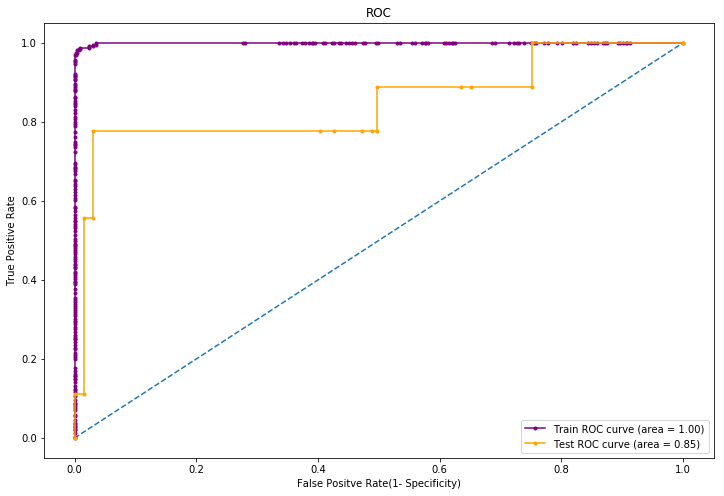

In [20]:
# ROC 
fp_train, tp_train, threshold_train = roc_curve(sm_y_train,train_pred_prob[:,1])
fp_test, tp_test, threshold_test = roc_curve(y_test,test_pred_prob[:,1])

# Calculate AUC
print('Train AUC:{0:0.2f}'.format(auc(fp_train, tp_train)))
print('Test AUC:{0:0.2f}'.format(auc(fp_test, tp_test)))

fig, ax = plt.subplots(figsize = (12,8))
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fp_train, tp_train, marker = '.', color = 'purple', label = 'Train ROC curve (area = %0.2f)'% auc(fp_train, tp_train))
plt.plot(fp_test, tp_test, marker = '.', color = 'orange', label = 'Test ROC curve (area = %0.2f)'% auc(fp_test, tp_test))

plt.xlabel('False Positve Rate(1- Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()


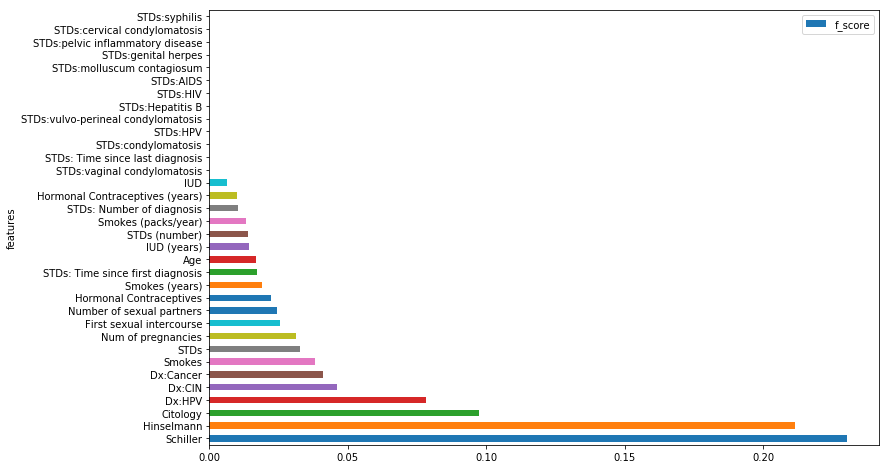

In [21]:
importance = pd.DataFrame(best_model.feature_importances_).rename(columns = {0:'f_score'})
importance['features'] = X_full.columns
importance.sort_values(['f_score'],ascending=False,inplace = True)

fig, ax = plt.subplots(figsize = (12,8))
importance.plot(kind = 'barh',x = 'features',y='f_score',ax=ax)
plt.show()

***
SMOTE improves the recall of the model
***

### Observations:
1. Missing value impute and SMOTE seems necessary for a better model